In [19]:
import torch 
import numpy as np 
import h5py
import pandas as pd 
import matplotlib.pyplot as plt
from tqdm import tqdm 

In [2]:
image_names=['gogo', 'saintjohn', 'dionisios', 'fanourios', 'odigitria', 'minos']
PATH = '/home/igeor/MSC-THESIS/data/h5'

image_filenames = [PATH + '/spec/' + x + '.hdf5' for x in image_names]
image_filenames

['/home/igeor/MSC-THESIS/data/h5/spec/gogo.hdf5',
 '/home/igeor/MSC-THESIS/data/h5/spec/saintjohn.hdf5',
 '/home/igeor/MSC-THESIS/data/h5/spec/dionisios.hdf5',
 '/home/igeor/MSC-THESIS/data/h5/spec/fanourios.hdf5',
 '/home/igeor/MSC-THESIS/data/h5/spec/odigitria.hdf5',
 '/home/igeor/MSC-THESIS/data/h5/spec/minos.hdf5']

### Noise reduction

In [54]:
spec_file = image_filenames[0]

# Open spectral image file
f = h5py.File(spec_file, 'r')
spec_image = f['Experiments/__unnamed__/data'][()] # numpy.ndarray 
f.close()

h, w, c = spec_image.shape
h, w, c

# Select bands
spec_image = spec_image[50:100, 50:100, 80:2128]

In [83]:
import numpy as np
from tqdm import tqdm

def median_filter(image, kernel_size):
    # Pad the image with zeros
    padded_image = np.pad(image, kernel_size // 2, mode='constant')
    # Extract the dimensions of the image
    h, w, c = image.shape
    # Create a sliding window view of the padded image
    window_shape = (kernel_size, kernel_size, c)
    window_strides = padded_image.strides
    windowed_image = np.lib.stride_tricks.as_strided(padded_image, shape=(h, w, *window_shape), strides=(window_strides[0], window_strides[1], *window_strides))
    # Apply the median filter to each window
    filtered_image = np.median(windowed_image, axis=(2, 3))
    return filtered_image

# Apply the median filter to the noisy image
filtered_image = median_filter(spec_image, kernel_size=3)

Text(0.5, 1.0, 'Filtered Image')

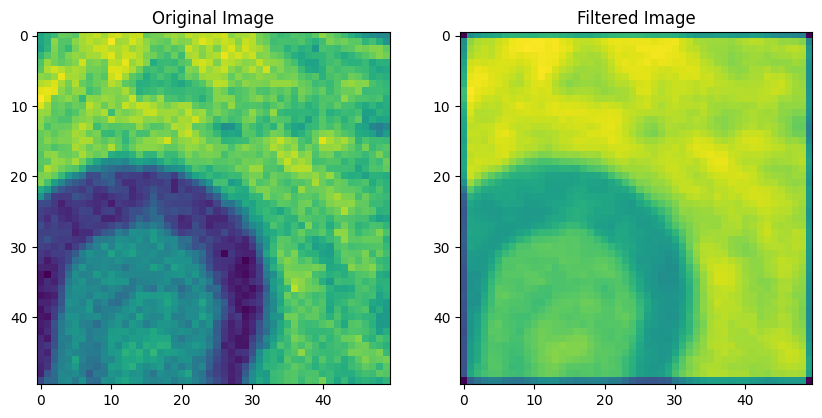

In [84]:
# Plot the noisy and filtered images
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(spec_image.sum(axis=-1))
ax[0].set_title('Original Image')
ax[1].imshow(filtered_image.sum(axis=-1))
ax[1].set_title('Filtered Image')

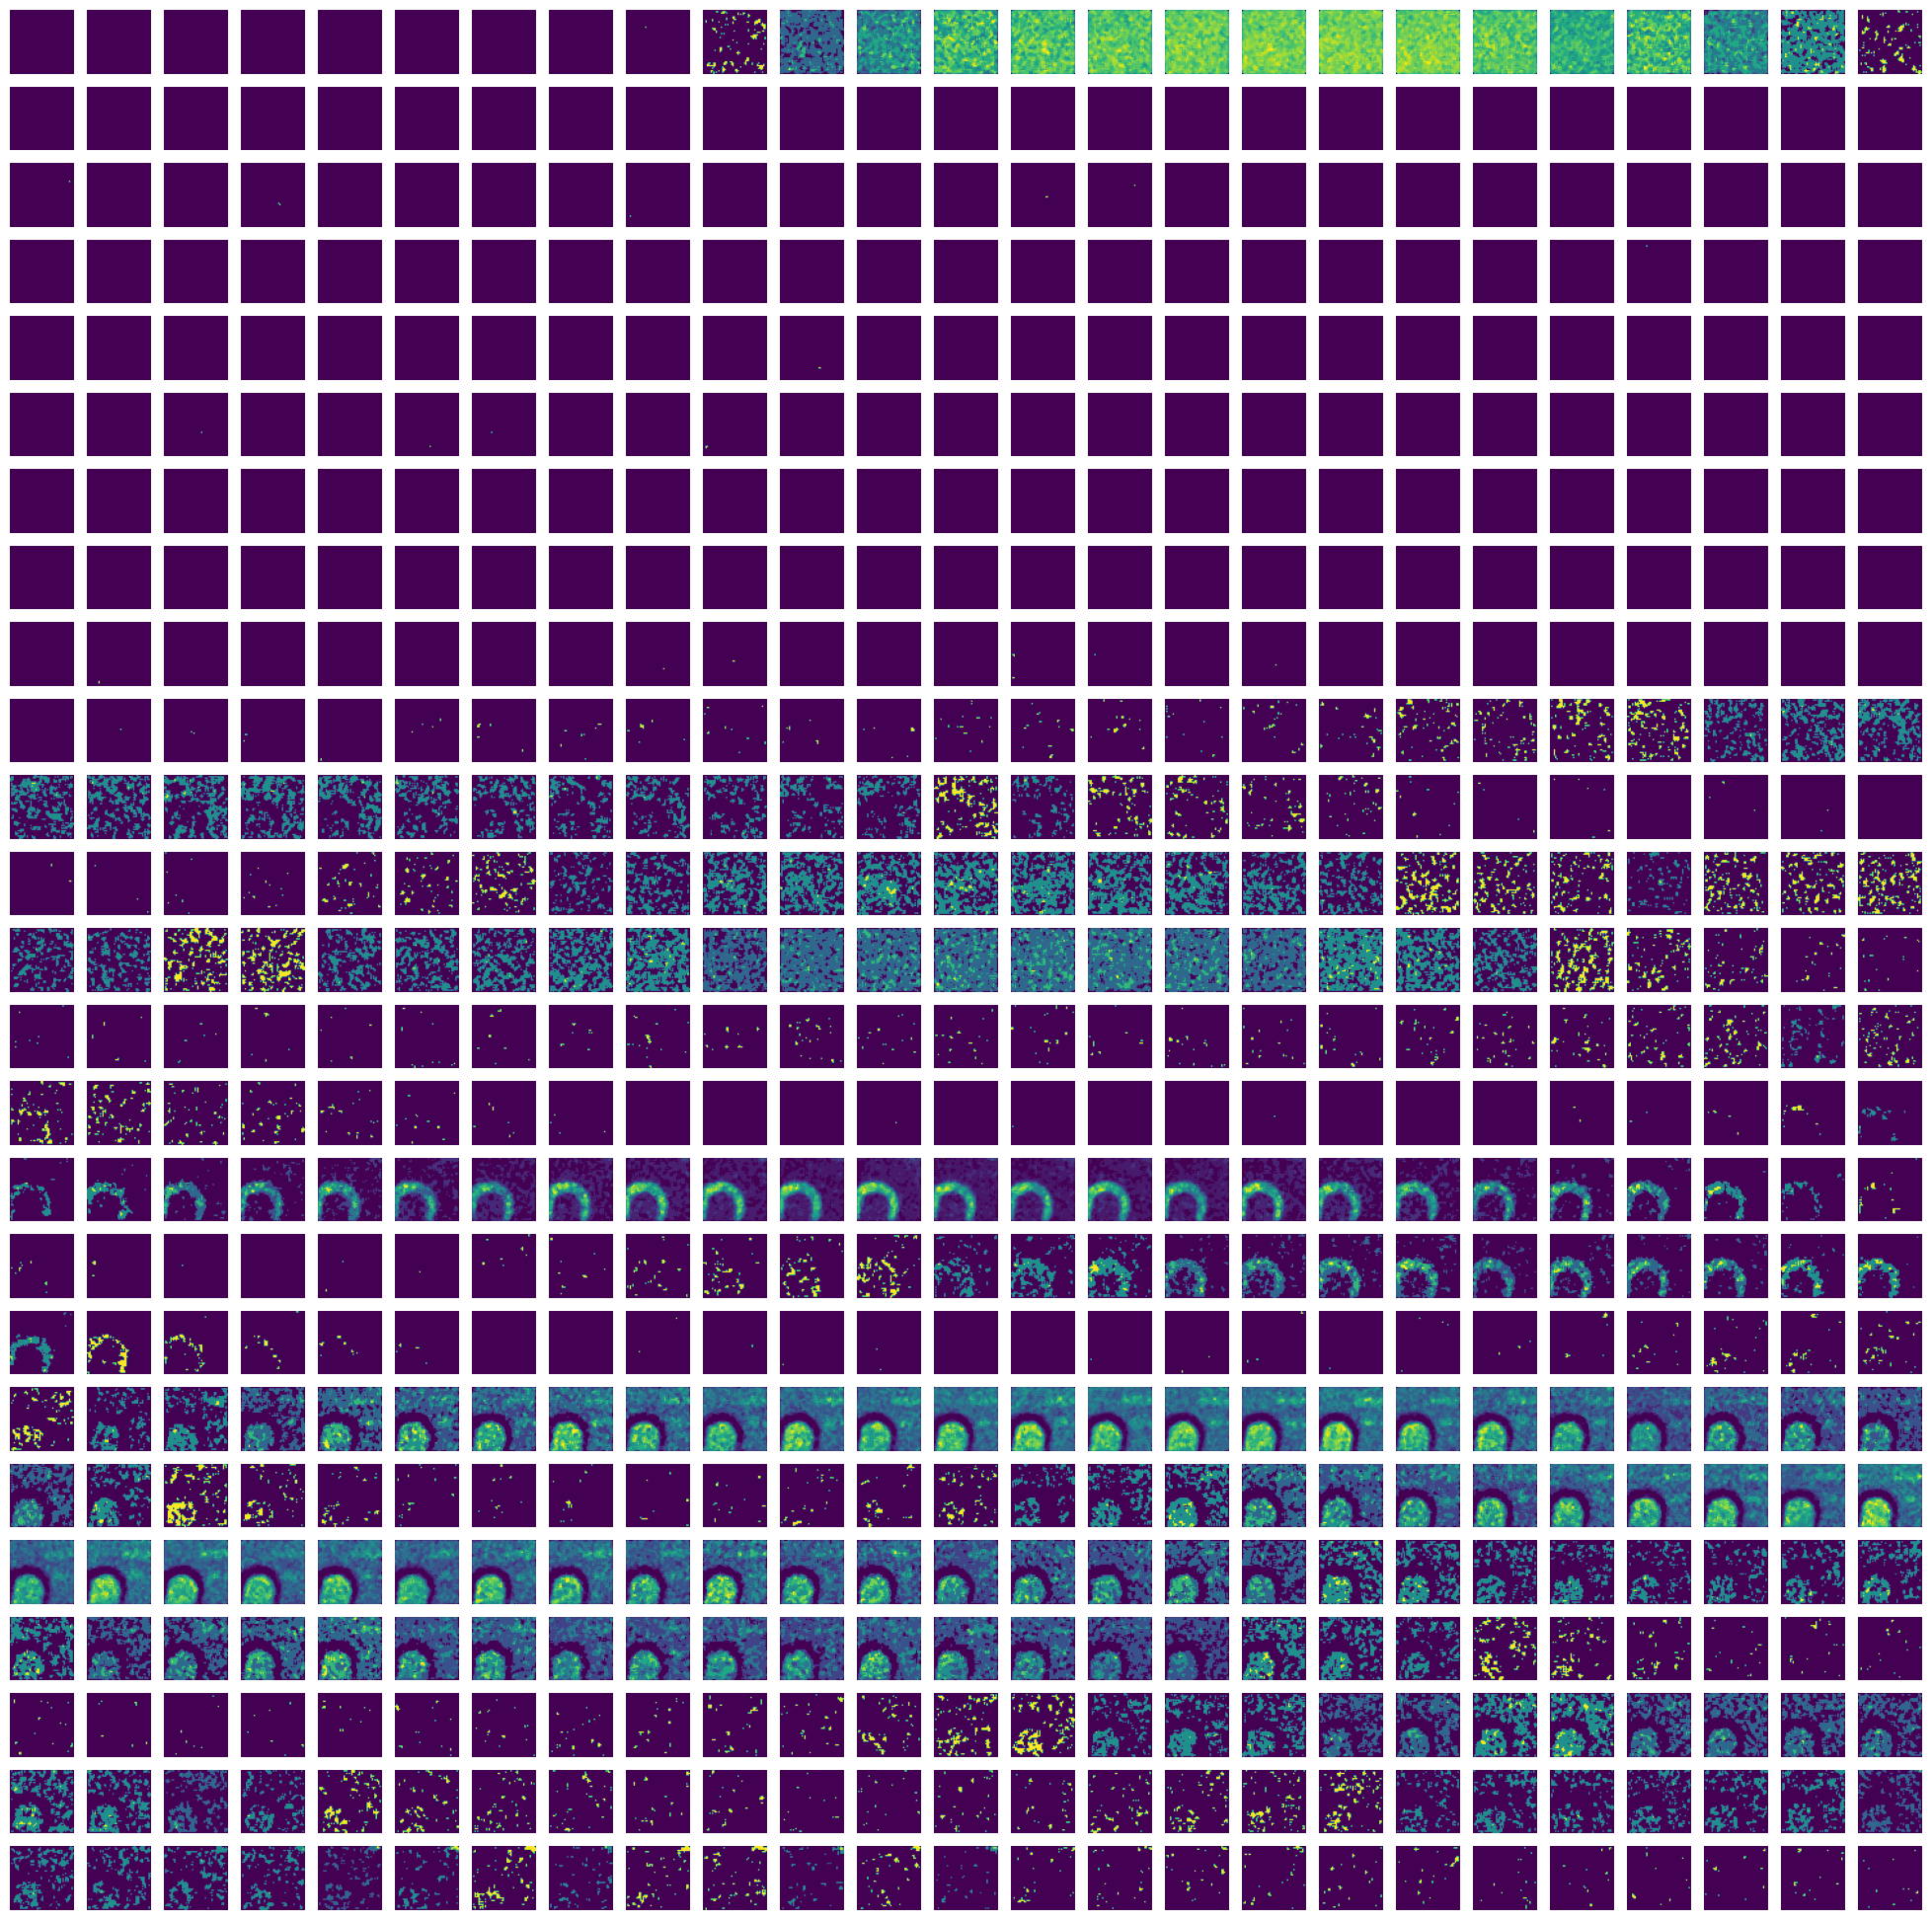

In [87]:
# Plot the first 50 bands of the noisy and filtered images
fig, ax = plt.subplots(25, 25, figsize=(25, 25))
for i in range(25):
    for j in range(25):
        ax[i, j].imshow(filtered_image[:, :, i*25+j])
        ax[i, j].axis('off')